In [20]:
!pip install idx2numpy  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# importing all teh necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import idx2numpy

In [22]:
os.chdir('/dataset')

In [23]:
file1 = 'train-images.idx3-ubyte'       #training set images
file2 = 'train-labels.idx1-ubyte'       #training set labels
file3 = 't10k-images.idx3-ubyte'        #test set images
file4 = 't10k-labels.idx1-ubyte'        #test set labels

train_data   = idx2numpy.convert_from_file(file1)   
train_label  = idx2numpy.convert_from_file(file2)
test_data    = idx2numpy.convert_from_file(file3)
test_label   = idx2numpy.convert_from_file(file4)


In [24]:
# Reshaping arrays
train_data = train_data.reshape(len(train_data), 784)
test_data = test_data.reshape(len(test_data), 784)

In [25]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

def pca_n(train_data, test_data, train_label, n):
  pca_n = PCA(n_components = n)
  lda_clf = LDA()

  pca_n.fit(train_data)
  pca_train = pca_n.transform(train_data)
  pca_test = pca_n.transform(test_data)
  lda_clf.fit(pca_train, train_label)

  return lda_clf, pca_test

In [26]:
predictions = []
m = int(input("Enter the no. of components: "))
for i in range(m):
  n = int(input("Enter the no. of dimensions: "))
  lda_clf_n, pca_test_n = pca_n(train_data, test_data, train_label, n)
  pred_N = lda_clf_n.predict(pca_test_n)   #prediction of labels obtained for test set for 15 components(col)
  predictions.append(pred_N)

Enter the no. of components: 3
Enter the no. of dimensions: 20
Enter the no. of dimensions: 10
Enter the no. of dimensions: 5


In [27]:
accuracy = []
for i in range(m):  
  acc = accuracy_score(test_label, predictions[i]) *100
  accuracy.append(acc)

print("Accuracy for PCA = 15:", accuracy[0])
print("Accuracy for PCA = 8:", accuracy[1])
print("Accuracy for PCA = 3:", accuracy[2])

Accuracy for PCA=15: 84.59
Accuracy for PCA=8: 77.47
Accuracy for PCA=3: 66.49000000000001


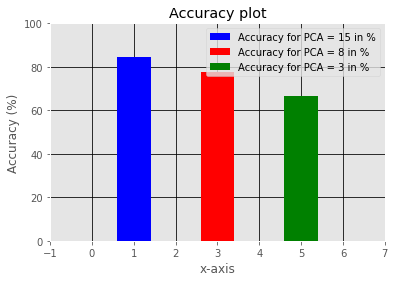

In [28]:
# Plotting bar diagram
from matplotlib import style
style.use("ggplot")

plt.bar([1], accuracy[0], color = "blue", label = "Accuracy for PCA = 15 in %")
plt.bar([3], accuracy[1], color = "red", label = "Accuracy for PCA = 8 in %")
plt.bar([5], accuracy[2], color = "green", label = "Accuracy for PCA = 3 in %")

plt.title("Accuracy plot")
plt.xlabel("x-axis")
plt.ylabel("Accuracy (%)")

plt.xlim([-1, 7])
plt.ylim([0, 100])
plt.legend()
plt.grid(True, color = "black")
plt.show()

**OBSERVATIONS:**
This question is done then mostly using inbuilt libraries like PCA and LDA, I
observed for reduction to cols=15 we get the best accuracy as you can see in 
the bar diagrams, the reason being PCA < 15 is merging most of the important dimensions/columns into [1..8] or [1..3] dimensions which leads to 
loss of valuable data for learning parameters.